# Иследовательский анализ данных

### Описание данных в student_mat.csv

Описание факторов:
- school — школа, в которой учится ученик (бинарный: GP — Gabriel Pereira или MS — Mousinho da Silveira).
- gender — пол ученика (бинарный: F — женский или M — мужской).
- age — возраст ученика (численный: от 15 до 22).
- address — тип местности, в которой живёт ученик (бинарный: U — город или R — пригород).
- famsize — размер семьи (бинарный: LE3 — «не больше 3 человек» или GT3 — «больше 3 человек»).
- Pstatus — семейный статус родителей (бинарный: T — «живут вместе» или A — «живут раздельно»).
- Medu — образование матери (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
- Fedu — образование отца (численный: 0 — «нет образования», 1 — «начальная школа» (4 класса), 2 — «от 5 до 9 классов», 3 — «среднее образование» или 4 — «высшее образование»).
- Mjob — работа матери (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяйка» или другое — «другое»).
- Fjob — работа отца (категориальный: teacher — «учитель», health — «работа в здравоохранении», services — «гражданская служба», at_home — «домохозяин» или другое — «другое»).
- reason — причина выбора этой школы (категориальный: home — «близко к дому», reputation — «репутация школы», course — «выбор предметов» или other — «другое»).
- guardian — попечитель ученика (категориальный: mother — «мать», father — «отец» или other — «кто-то другой»).
- traveltime — время в пути от дома до школы (численный: 1 — «меньше 15 минут», 2 — «от 15 до 30 минут», 3 — «от 30 минут до 1 часа» или 4 — «больше 1 часа»).
- studytime — время на учёбу в неделю (численный: 1 — «меньше 2 часов», 2 — «от 2 до 5 часов», 3 — «от 5 до 10 часов» или 4 — «больше 10 часов»).
- failures — число незачётов по предмету в прошлом (численный: от 0 до 3).
- schoolsup — дополнительная образовательная поддержка (бинарный: yes — да или no — нет).
- famsup — дополнительная семейная поддержка (бинарный: yes — да или no — нет).
- paid — дополнительные занятия по предмету (бинарный: yes — да или no — нет).
- activities — внеучебная деятельность (бинарный: yes — да или no — нет).
- nursery — ходил в подготовительную школу (бинарный: yes — да или no — нет).
- higher — планирует получать высшее образование (бинарный: yes — да или no — нет).
- internet — есть доступ к интернету дома (бинарный: yes — да или no — нет).
- romantic — есть вторая половинка (бинарный: yes — да или no — нет).
- famrel — отношения в семье (численный: от 1 — «очень плохие» до 5 — «очень хорошие»).
- freetime — свободное время после школы (численный: от 1 — «очень мало» до 5 — «очень много»).
- goout — время с друзьями (численный: от 1 — «очень мало» до 5 — «очень много»).
- health — состояние здоровья (численный: от 1 — «очень плохое» до 5 — «очень хорошее»).
- absences — число пропусков занятий (численный: от 0 до 93).
- G1 — оценка за первый учебный период (численный: от 0 до 20).

Предсказываемая характеристика:
- G3 — итоговая оценка (численный: от 0 до 20).

### Загрузка и первичное исследование образовательных данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split
from IPython.display import display

In [2]:
# Чтение данных
sns.set(rc={'figure.figsize': (11.7, 8.27)})
student_dataset = pd.read_csv('../../data/student_mat.csv')

print(f'Размерность данных: {student_dataset.shape}')
print('\nПервые 5 строк данных:')
display(student_dataset.head())

Размерность данных: (395, 30)

Первые 5 строк данных:


,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,7,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,15,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,6,10


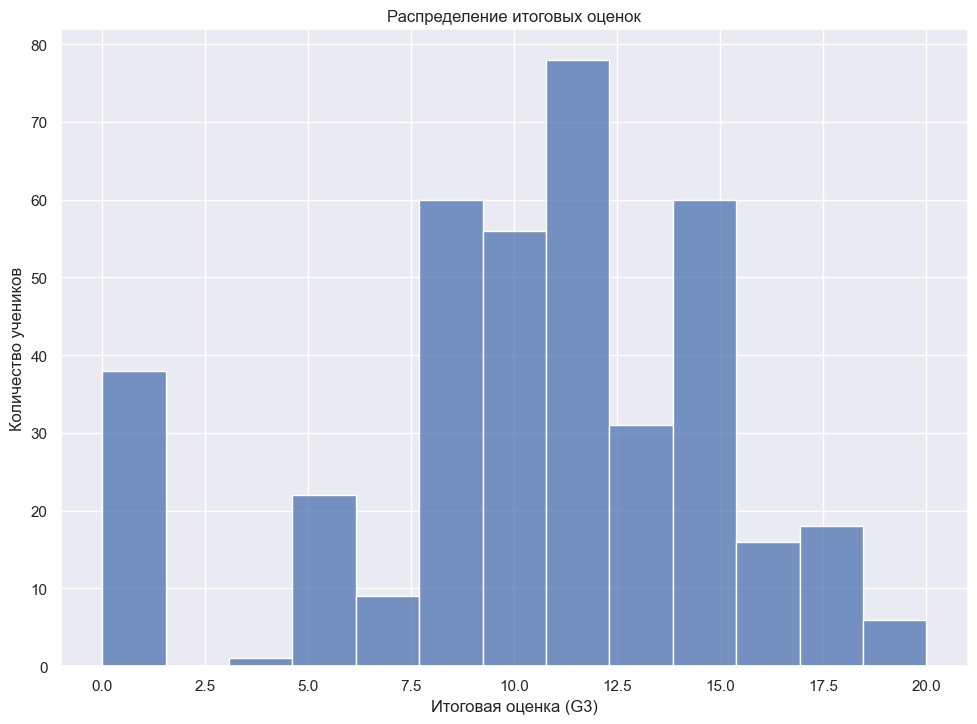

In [3]:
# Визуализация распределения итоговых оценок учеников
sns.histplot(student_dataset['G3'])
plt.title('Распределение итоговых оценок')
plt.xlabel('Итоговая оценка (G3)')
plt.ylabel('Количество учеников')
plt.show()

Наблюдаем много итоговых оценок, равных нулю. Для углубленного анализа нулевых итоговых оценок мы исследуем успеваемость этих учеников за первое полугодие (G1). Это позволит определить, была ли низкая результативность прогнозируемой или носила внезапный характер.

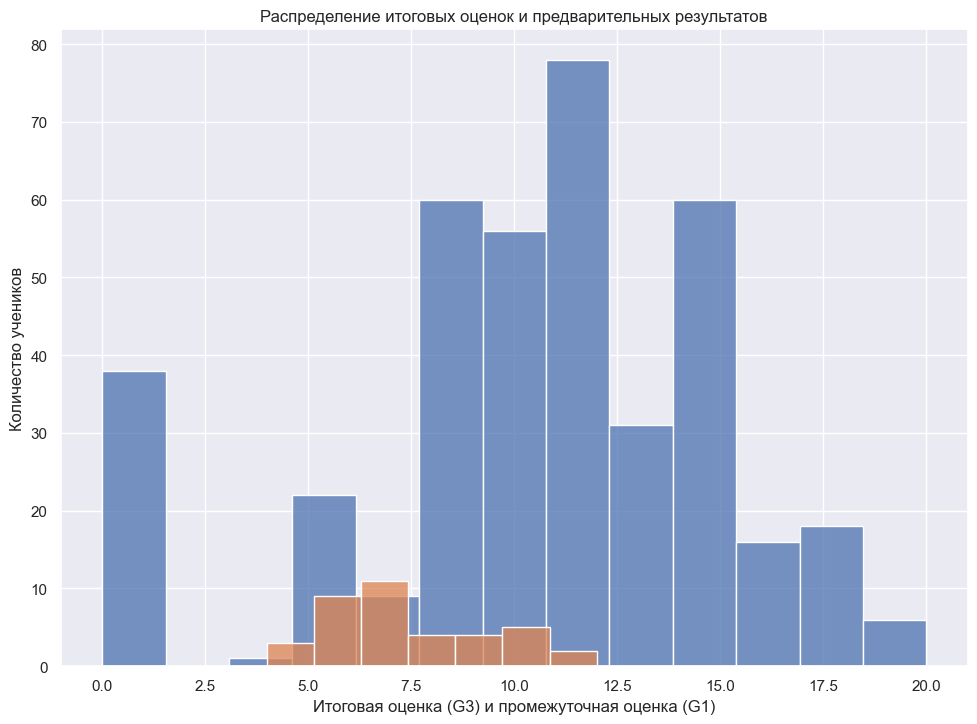

In [4]:
sns.histplot(student_dataset['G3'])
sns.histplot(student_dataset[student_dataset['G3'] == 0]['G1'])
plt.title('Распределение итоговых оценок и предварительных результатов')
plt.xlabel('Итоговая оценка (G3) и промежуточная оценка (G1)')
plt.ylabel('Количество учеников')
plt.show()

Обнаружено несоответствие: студенты с нулевым итоговым баллом демонстрировали заметную успеваемость в первом полугодии. Это указывает на аномалии в данных, вероятно, связанные с ошибками ввода или особыми обстоятельствами. Для построения более точной модели такие случаи были исключены из анализа.

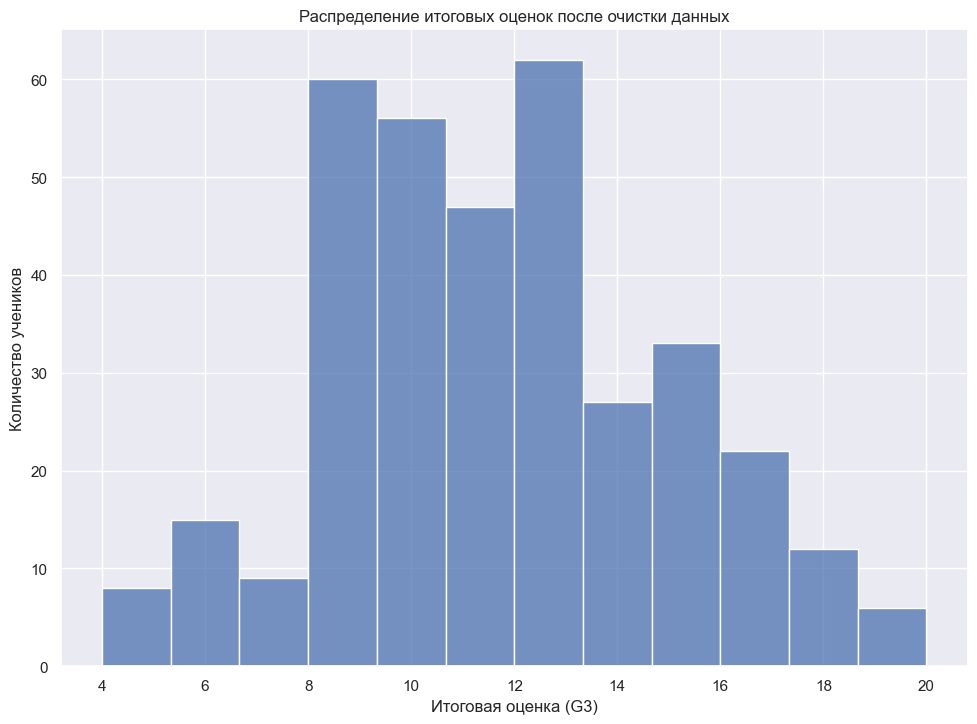

In [5]:
filtered_data = student_dataset[student_dataset['G3'] != 0]
sns.histplot(filtered_data['G3'])
plt.title('Распределение итоговых оценок после очистки данных')
plt.xlabel('Итоговая оценка (G3)')
plt.ylabel('Количество учеников')
plt.show()

### Формирование обучающей и тестовой выборок

In [6]:
predictors = filtered_data.drop(columns=['G3'])
target_variable = filtered_data['G3']

# Так как данных слишком мало, в тестовой выборке будет всего 50 значений, а
# валидационная выборка не будет создана
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
    predictors, target_variable, test_size=50, random_state=52)

print(f'Размер обучающей выборки: {x_train_split.shape[0]}')
print(f'Размер тестовой выборки: {x_test_split.shape[0]}')

Размер обучающей выборки: 307
Размер тестовой выборки: 50


### Анализ взаимосвязей между численными факторами и итоговой оценкой

In [7]:
training_data_with_target = x_train_split.copy(deep=True)
training_data_with_target['G3'] = y_train_split
numeric_features = training_data_with_target.select_dtypes(
    include=['int64', 'float64'])
correlation_analysis = numeric_features.corr()['G3']

print('Анализ корреляционных связей:')
display(correlation_analysis.to_frame(''))

Анализ корреляционных связей:


,
age,-0.124842
Medu,0.156956
Fedu,0.133866
traveltime,-0.070539
studytime,0.122987
failures,-0.306787
famrel,0.074646
freetime,0.001826
goout,-0.172547
health,-0.075481


Результаты корреляционного анализа позволяют выделить три наиболее значимых фактора успеваемости:

- G1 - исключительно сильный позитивный фактор (r = 0.89)
- Failures - значимый негативный фактор (r = -0.31)
- Absences - умеренный негативный фактор (r = -0.23)

Указанные факторы будут нести максимальную информационную ценность для построения модели прогнозирования.

In [8]:
# Отбор статистически значимых корреляций
significant_correlations = correlation_analysis[
    (correlation_analysis >= 0.1) | (correlation_analysis <= -0.1)]

print('Статистически значимые корреляции:')
display(significant_correlations.sort_values(ascending=False).to_frame(''))

Статистически значимые корреляции:


,
G3,1.000000
G1,0.889723
Medu,0.156956
Fedu,0.133866
studytime,0.122987
age,-0.124842
goout,-0.172547
absences,-0.232230
failures,-0.306787


Графики для фактора "age":


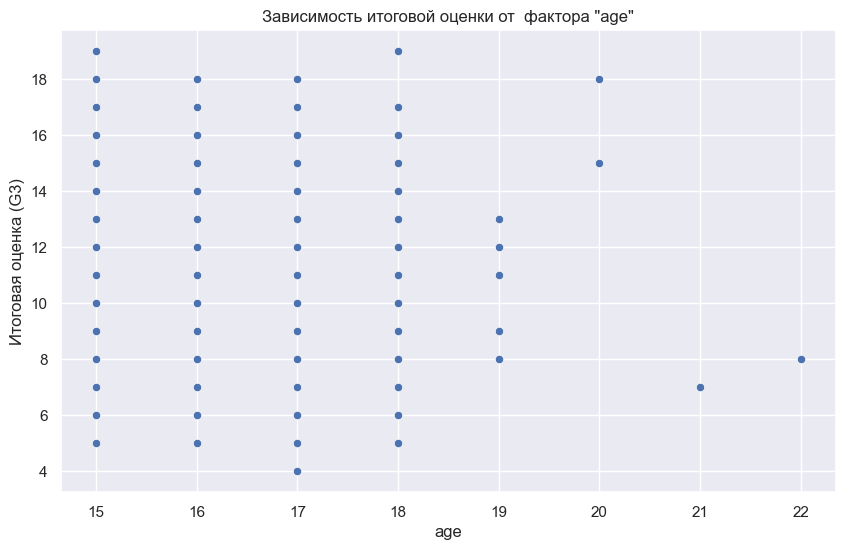

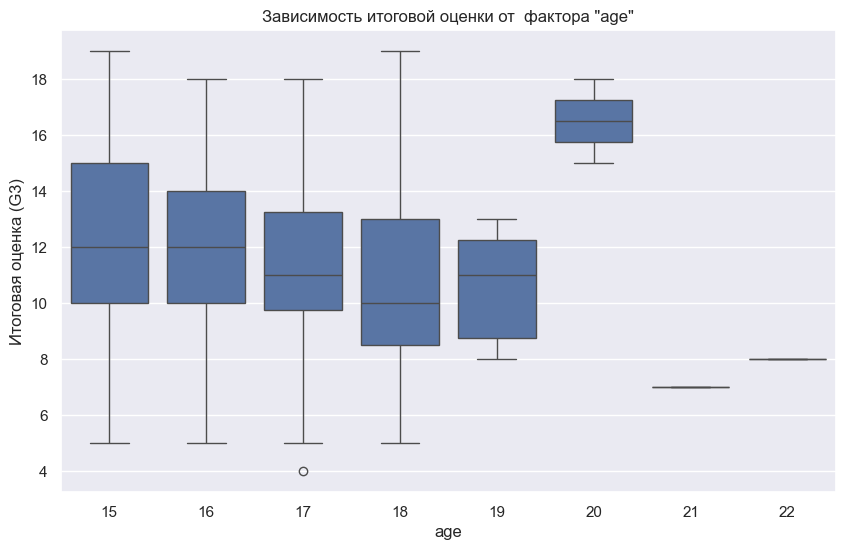

Графики для фактора "Medu":


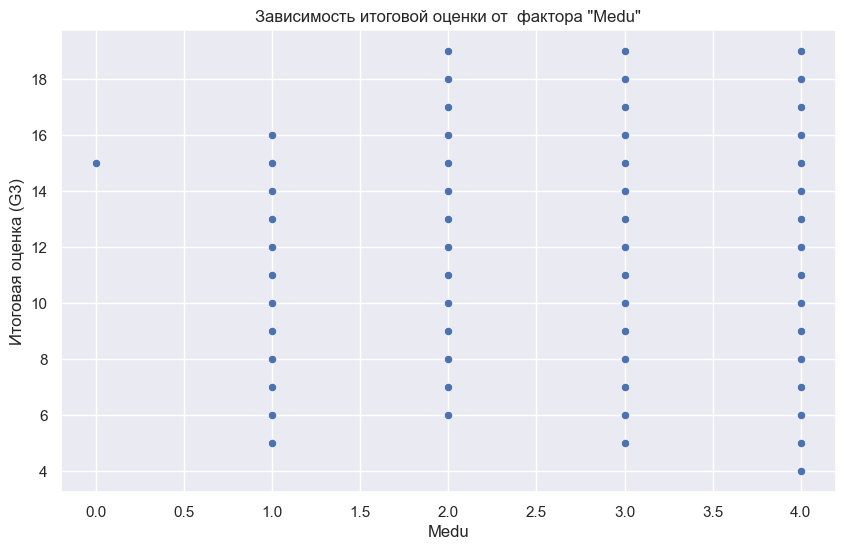

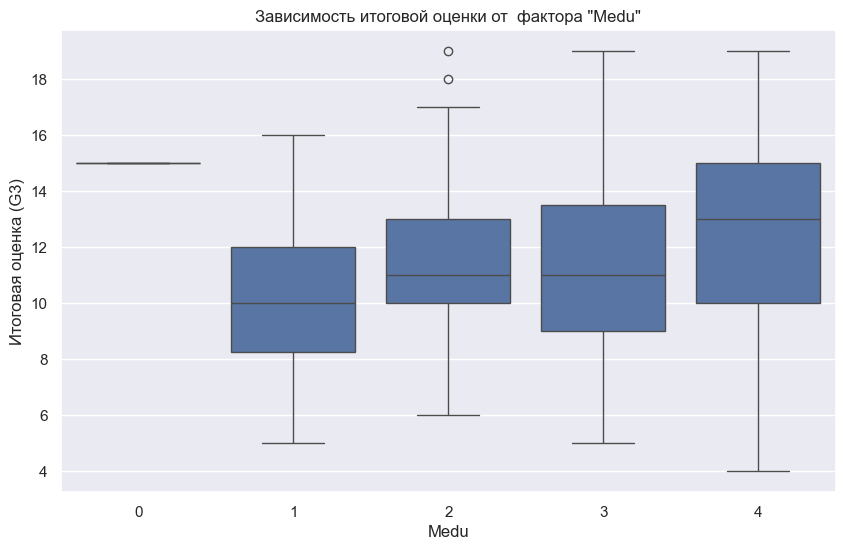

Графики для фактора "Fedu":


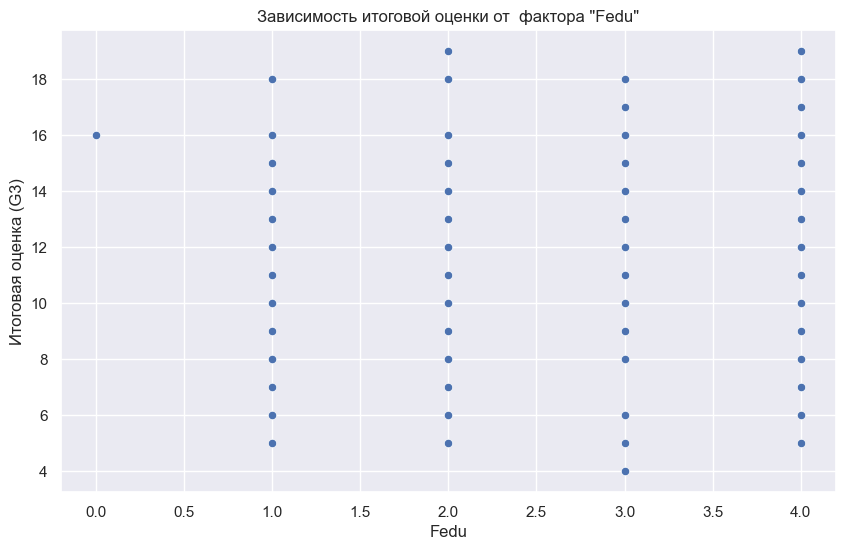

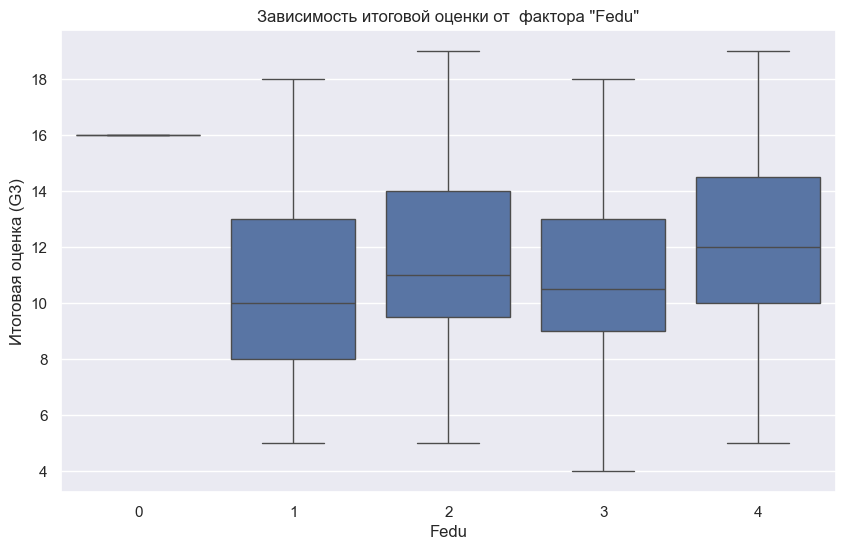

Графики для фактора "traveltime":


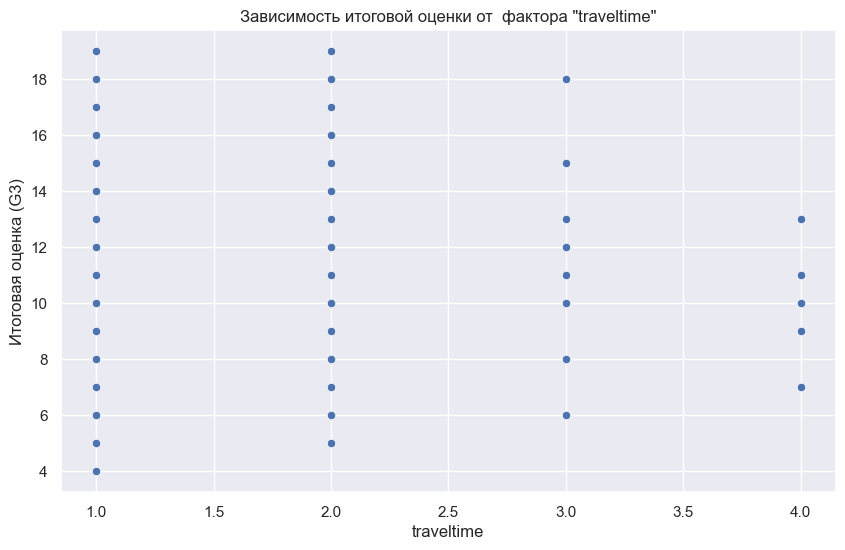

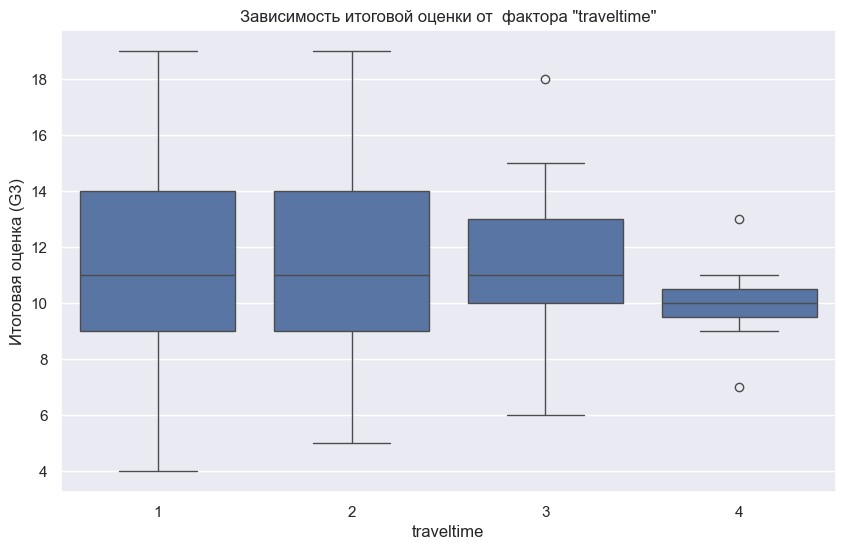

Графики для фактора "studytime":


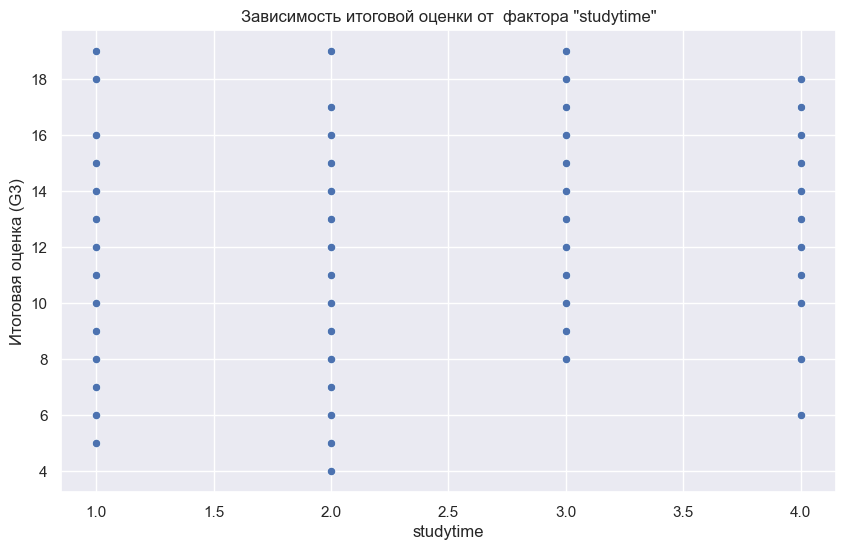

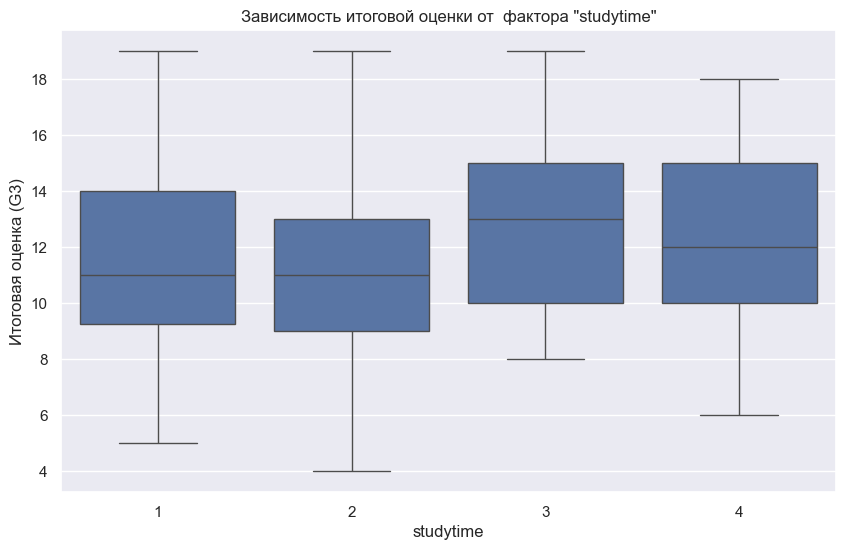

Графики для фактора "failures":


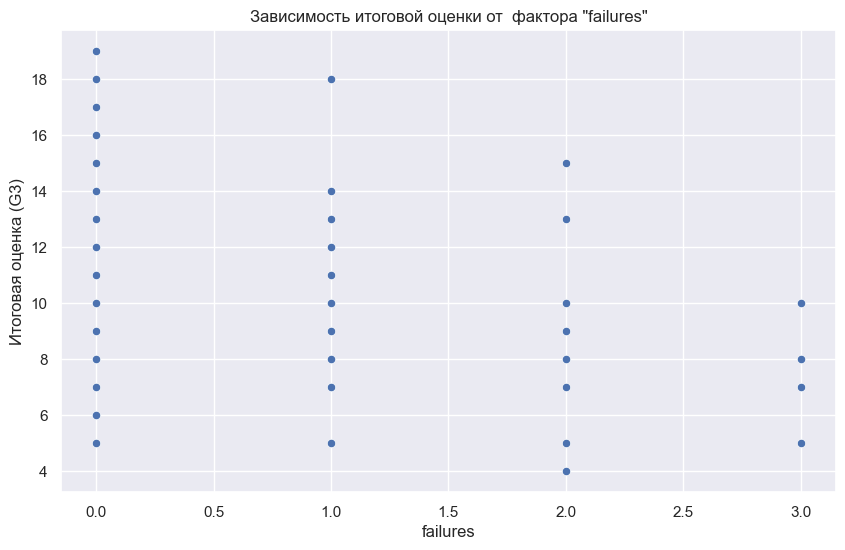

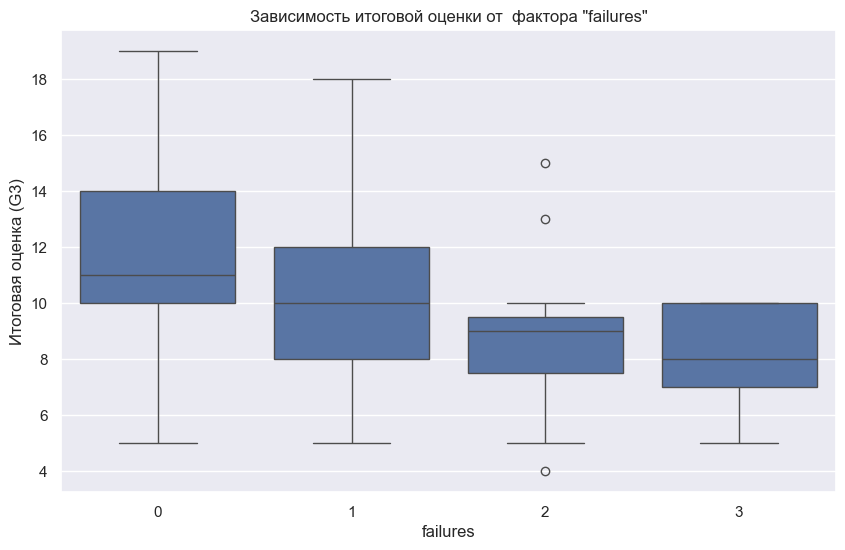

Графики для фактора "famrel":


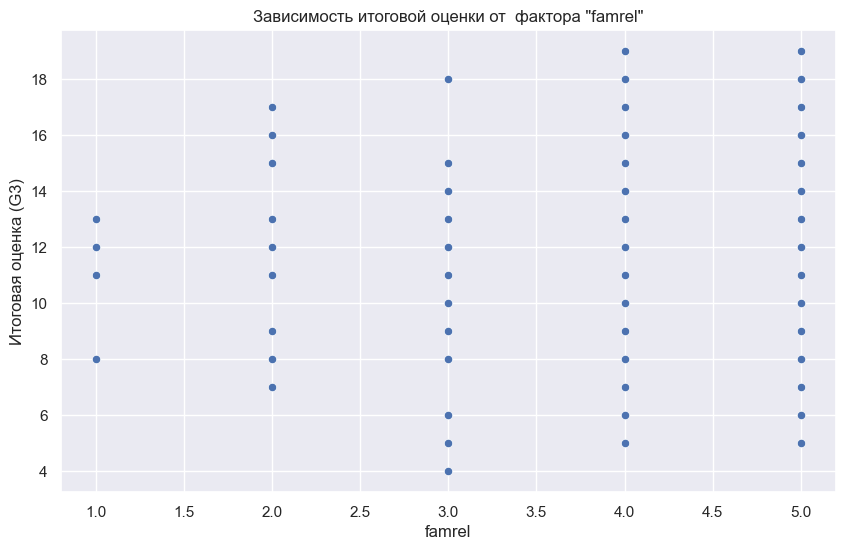

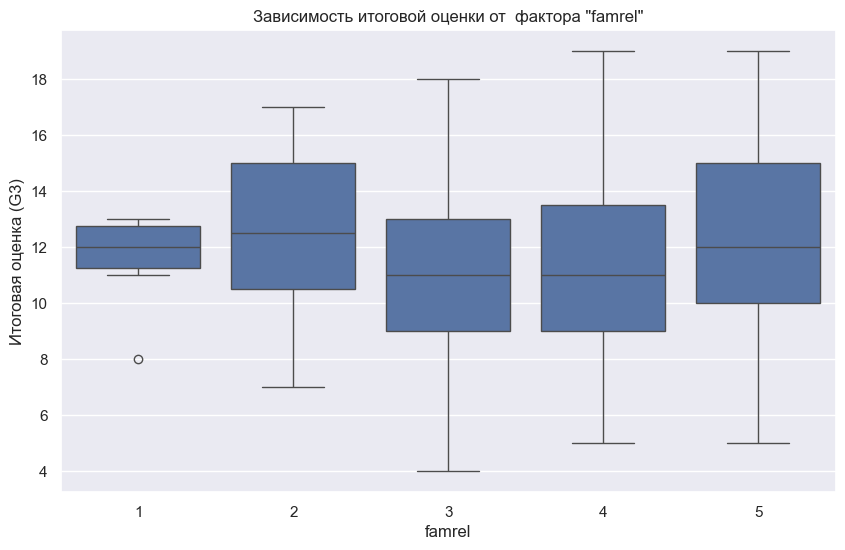

Графики для фактора "freetime":


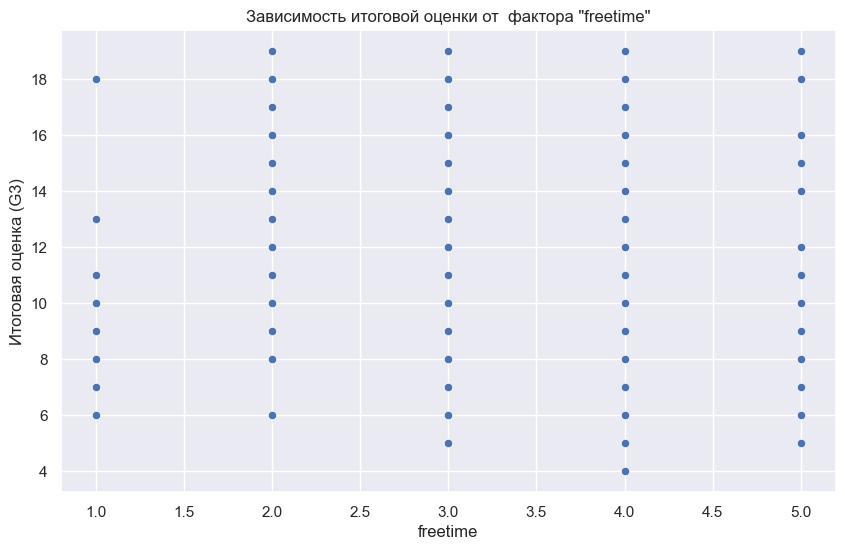

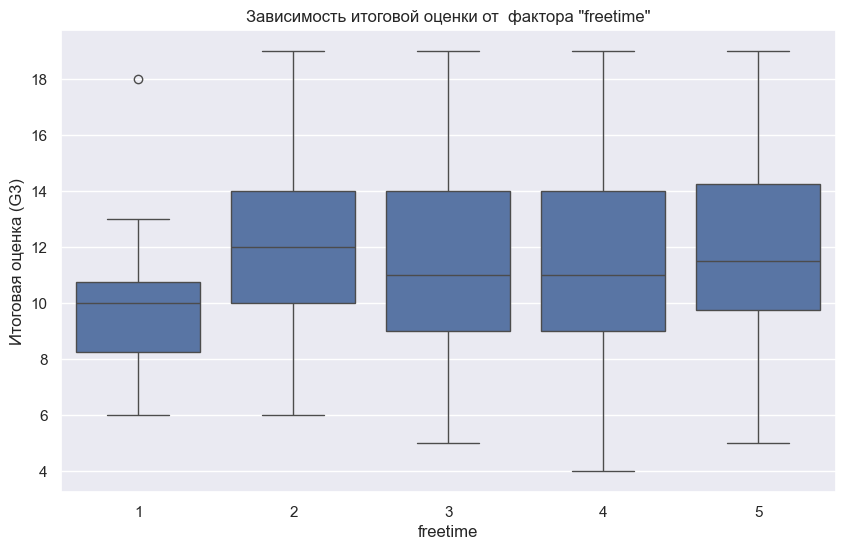

Графики для фактора "goout":


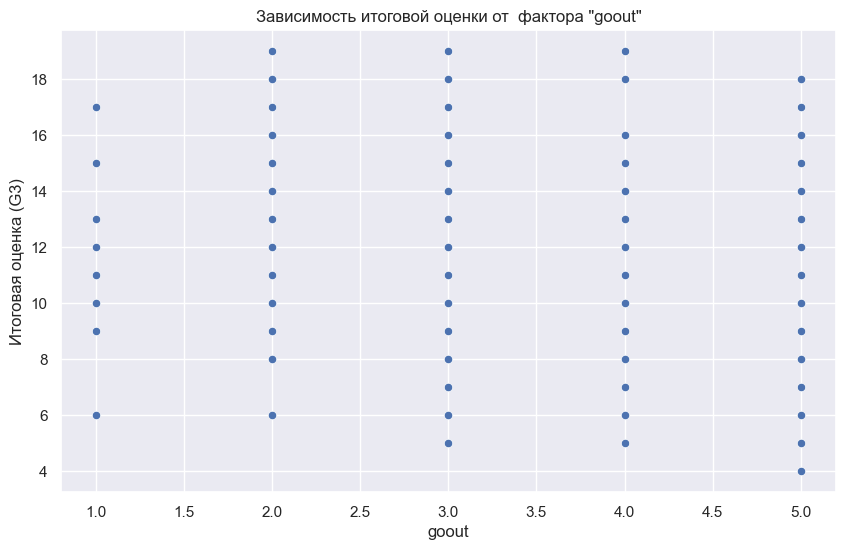

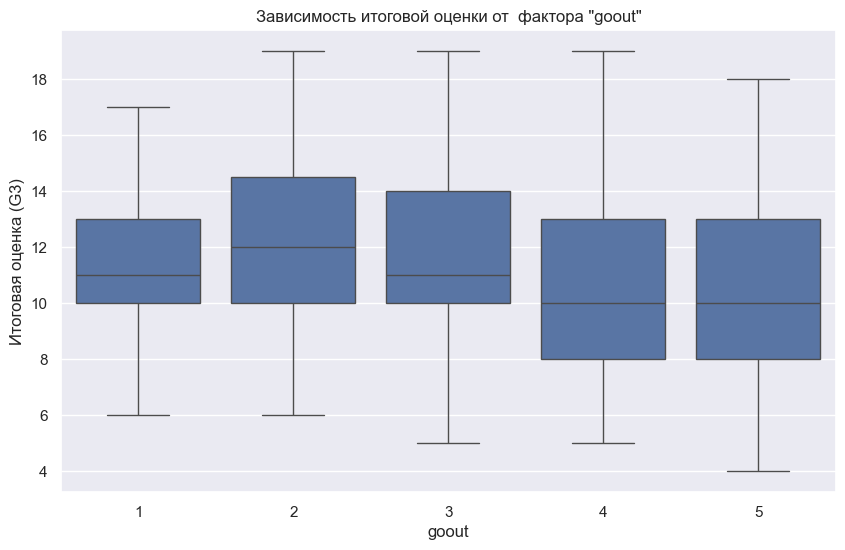

Графики для фактора "health":


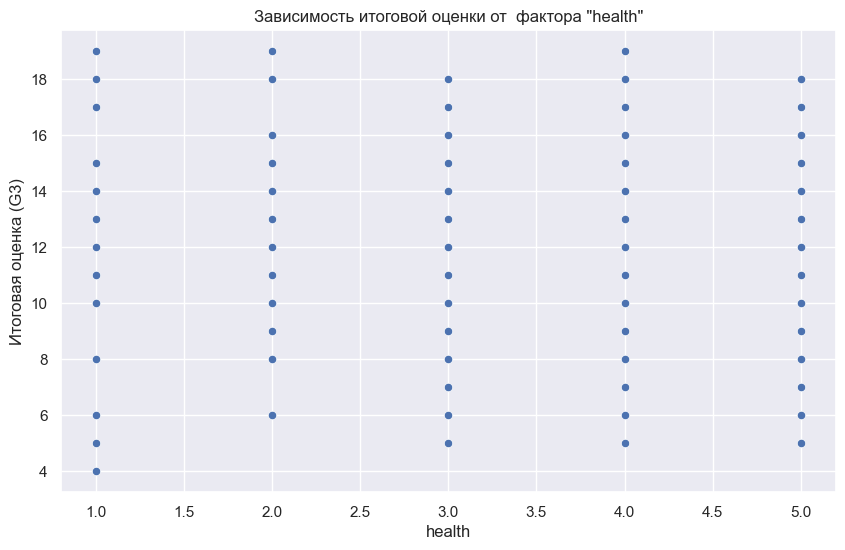

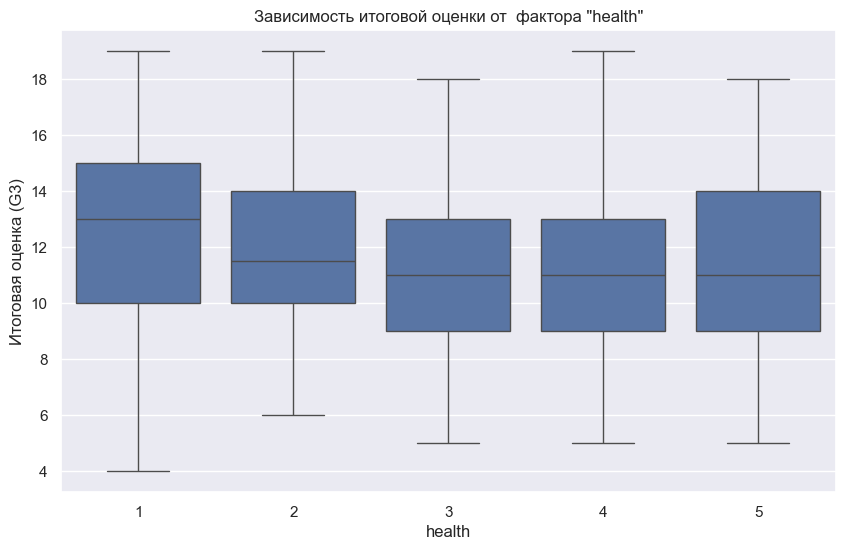

Графики для фактора "absences":


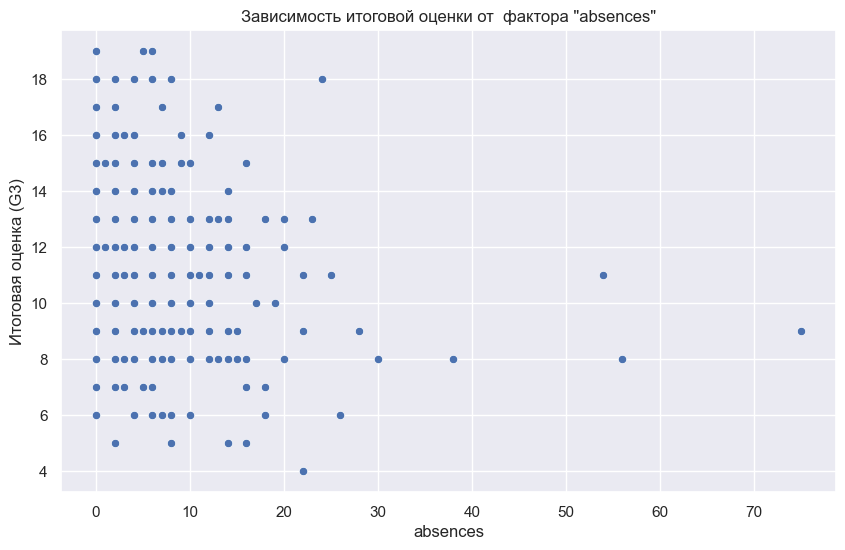

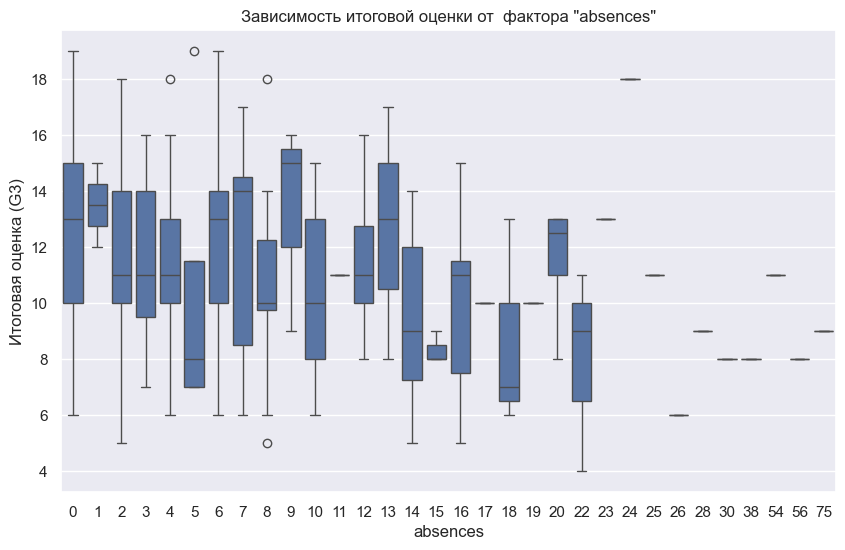

Графики для фактора "G1":


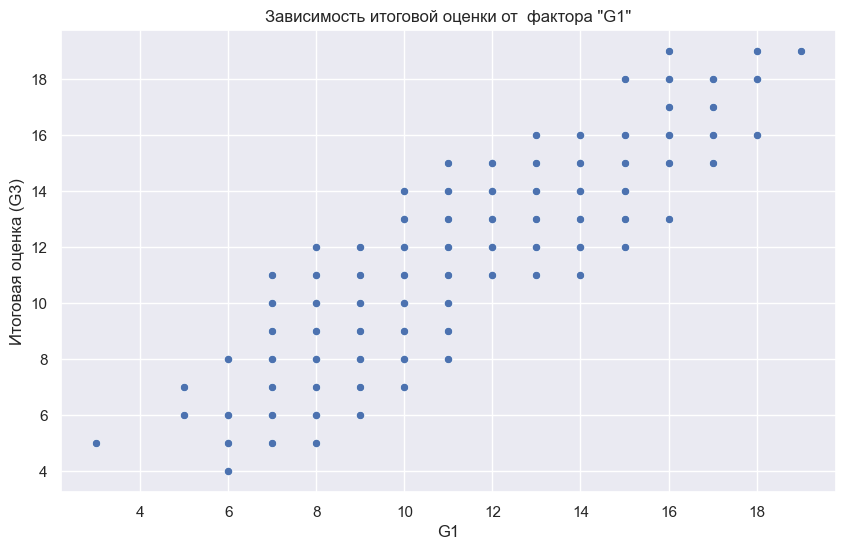

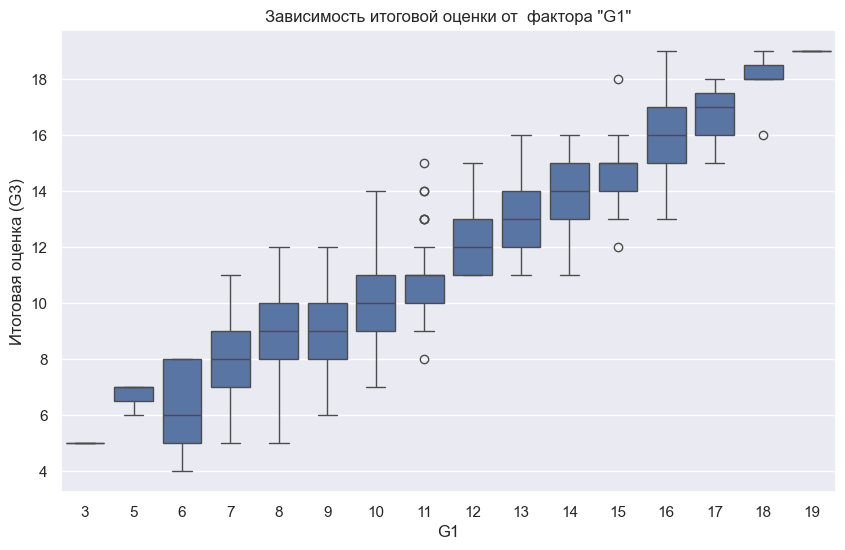

In [9]:
# Анализ графиков для переменных с высокой корреляцией
selected_numeric_features = correlation_analysis.drop('G3').index.tolist()
for variable in selected_numeric_features:
    print(f'Графики для фактора "{variable}":')
    # Первый график зависимости
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=training_data_with_target[variable],
                    y=training_data_with_target['G3'])
    plt.title(f'Зависимость итоговой оценки от  фактора "{variable}"')
    plt.xlabel(variable)
    plt.ylabel('Итоговая оценка (G3)')
    plt.show()

    # Второй график зависимости
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=training_data_with_target[variable],
                y=training_data_with_target['G3'])
    plt.title(f'Зависимость итоговой оценки от  фактора "{variable}"')
    plt.xlabel(variable)
    plt.ylabel('Итоговая оценка (G3)')
    plt.show()

Ключевые закономерности, выявленные с помощью визуального анализа:

1. Возраст ("age") - наблюдается отрицательная тенденция: с ростом возраста успеваемость в среднем снижается. Аномалия: резкий скачок показателей в возрасте 20 лет, что, вероятно, является выбросом и требует дополнительной проверки.
2. Образование родителей ("Medu", "Fedu") - выявлена четкая положительная корреляция между уровнем образования матери ("Medu") и академическими результатами. Чем выше образование матери, тем лучше в среднем успеваемость учеников.
3. Академические неудачи ("failures") - обнаружена сильная зависимость: ученики с меньшим количеством проваленных предметов демонстрируют значительно более высокие итоговые оценки. Это свидетельствует о систематическом характере академической успеваемости.
4. Свободное время ("freetime") - ученики с минимальным количеством свободного времени показывают более плохие результаты. Это может указывать на проблемы с тайм-менеджментом или чрезмерную учебную нагрузку.
5. Оценка за первое полугодие ("G1") - наиболее значимый предиктор с четкой линейной зависимостью. Высокие результаты в первом полугодии практически гарантируют высокие итоговые оценки.

Остальные рассмотренные факторы не демонстрируют существенных закономерностей.

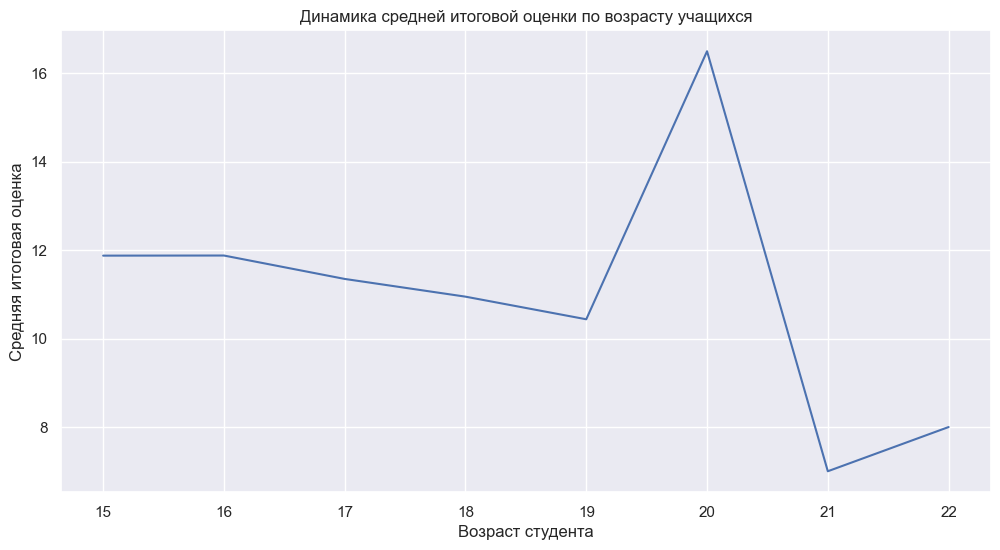

In [10]:
# Анализ возрастной динамики успеваемости
plt.figure(figsize=(12, 6))
sns.lineplot(x=training_data_with_target['age'],
             y=training_data_with_target['G3'], estimator='mean',
             errorbar=None)
plt.title('Динамика средней итоговой оценки по возрасту учащихся')
plt.xlabel('Возраст студента')
plt.ylabel('Средняя итоговая оценка')
plt.grid(True)
plt.show()

Анализ графика показывает слабую зависимость связь между возрастом и успеваемостью. При этом наблюдаются явные аномалии - резкие скачки результатов в возрасте 20 и 21 года, не соответствующие общей тенденции. Учитывая незначительность основной зависимости, эти точки, вероятно, являются статистическими выбросами.

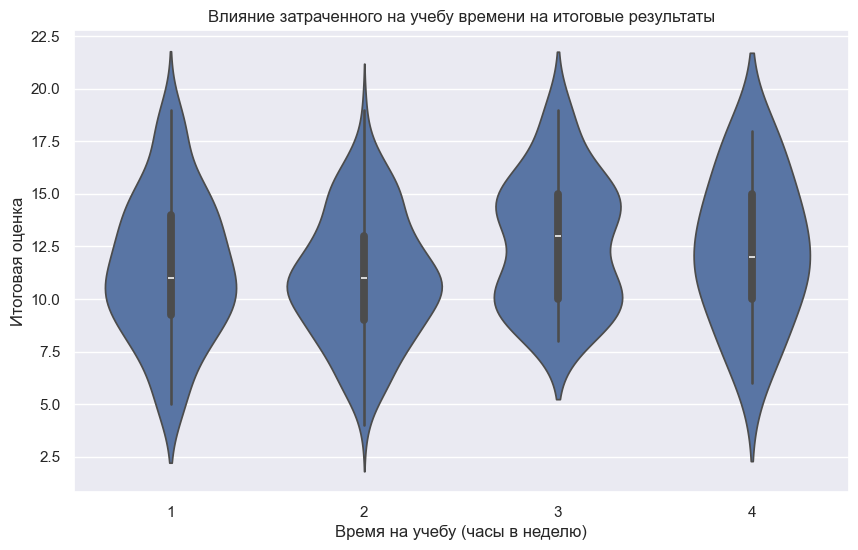

In [11]:
# Комплексный анализ затраченного на учебу времени и его влияния на результаты
plt.figure(figsize=(10, 6))
sns.violinplot(x=training_data_with_target['studytime'],
               y=training_data_with_target['G3'])
plt.title('Влияние затраченного на учебу времени на итоговые результаты')
plt.xlabel('Время на учебу (часы в неделю)')
plt.ylabel('Итоговая оценка')
plt.show()

Можно заметить, что связь между временем на учебу и итоговой оценкой статистически незначима.

In [12]:
# Вывод самых информативных числовых факторов
print('Отобранные числовые признаки для моделирования:')
display(selected_numeric_features)

Отобранные числовые признаки для моделирования:


['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1']

### Анализ взаимосвязей между категориальными факторами и итоговой оценкой

In [13]:
categorical_features = [
    'school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

def analyze_categorical_influence(data, categorical_cols, target_col='G3'):
    """Анализирует влияние категориальных признаков на целевую переменную"""
    influence_metrics = []

    for feature in categorical_cols:
        # Агрегирование средних значений целевой переменной по категориям
        aggregated_data = data.groupby(
            feature, as_index=False).agg({target_col: 'mean'})

        # Вычисление статистических метрик
        target_values = aggregated_data[target_col].values
        influence_metrics.append({
            'sign': feature,
            'range': np.max(target_values) - np.min(target_values)
        })
    return pd.DataFrame(influence_metrics)

In [14]:
# Анализирование влияния категориальных факторов
categorical_analysis_df = analyze_categorical_influence(
    training_data_with_target, categorical_features)

# Сортировка по диапазону влияния (наибольшее влияние сверху)
categorical_analysis_df = categorical_analysis_df.sort_values(
    'range', ascending=False)

print('Анализ влияния категориальных факторов на итоговую оценку:')
display(categorical_analysis_df.reset_index(drop=True))

Анализ влияния категориальных факторов на итоговую оценку:


,sign,range
0,Fjob,2.255952
1,Mjob,2.220917
2,schoolsup,2.212977
3,higher,1.795395
4,school,1.067437
5,reason,0.778428
6,address,0.759845
7,internet,0.751384
8,guardian,0.739899
9,romantic,0.531836


Анализ вариативности признаков выявил наиболее значимые факторы: «Fjob», «Mjob», «schoolsup», «higher» и «school». Их высокий разброс значений указывает на существенные различия в данных, что делает эти переменные наиболее информативными для прогнозирования в модели. Остальные признаки, такие как «nursery» или «famsize», демонстрируют низкую вариативность и, вероятно, окажут незначительное влияние на результат.

In [15]:
# Автоматический отбор наиболее значимых признаков
significant_categorical_features = categorical_analysis_df[
    categorical_analysis_df['range'] > 1.0]['sign'].tolist()

print('Значимые категориальные факторы:')
print(significant_categorical_features)

Значимые категориальные факторы:
['Fjob', 'Mjob', 'schoolsup', 'higher', 'school']


### Подготовка данных для моделирования

In [16]:
# Кодирование значимых категориальных признаков
def encode_categorical_features(data, features_to_encode, target_col='G3'):
    """Выполняет target encoding для указанных категориальных признаков"""
    encoders = {}
    encoded_data = data.copy(deep=True)

    for feature in features_to_encode:
        encoder = TargetEncoder()
        encoder.fit(data[feature], data[target_col])
        encoded_data[f'{feature}_encoded'] = encoder.transform(data[feature])
        encoders[feature] = encoder
    return encoded_data, encoders

training_data_encoded, feature_encoders = encode_categorical_features(
    training_data_with_target, significant_categorical_features)

# Формирование финального набора признаков для моделирования
final_features = selected_numeric_features + [
    f'{feature}_encoded' for feature in significant_categorical_features
]
x_train_processed = training_data_encoded[final_features].copy(deep=True)

# Масштабирование данных
data_scaler = MinMaxScaler()
data_scaler.fit(x_train_processed)
x_train_scaled = data_scaler.transform(x_train_processed)

# Перевод полученных данных из матрицы обратно в таблицу
x_train_scaled_df = pd.DataFrame(
    x_train_scaled,
    columns=x_train_processed.columns,
    index=x_train_processed.index
)

# Подготовка тестовой выборки
test_data_with_target = x_test_split.copy(deep=True)
test_data_with_target['G3'] = y_test_split

# Применение target encoding к категориальным признакам с использованием
# энкодеров, обученных на тренировочных данных
test_data_encoded = test_data_with_target.copy(deep=True)
for feature in significant_categorical_features:
    # Использование энкодера, обученного на тренировочных данных
    encoder = feature_encoders[feature]
    test_data_encoded[f'{feature}_encoded'] = encoder.transform(
        test_data_with_target[feature])

# Формирование финального набора признаков для тестовой выборки
x_test_processed = test_data_encoded[final_features].copy(deep=True)

# Масштабирование тестовых данных с использованием scaler, обученного на
# тренировочных данных
x_test_scaled = data_scaler.transform(x_test_processed)

# Перевод полученных данных из матрицы обратно в таблицу
x_test_scaled_df = pd.DataFrame(
    x_test_scaled,
    columns=x_test_processed.columns,
    index=x_test_processed.index
)

### Вывод подготовленных данных

In [17]:
print('Закодированные данные для обучения (первые 5 строк):')
display(x_train_processed.head())

print('\nМасштабированные данные для обучения (первые 5 строк):')
display(x_train_scaled_df.head())

Закодированные данные для обучения (первые 5 строк):


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,Fjob_encoded,Mjob_encoded,schoolsup_encoded,higher_encoded,school_encoded
391,17,3,1,2,1,0,2,4,5,2,3,14,11.454583,11.848348,11.812977,11.564626,10.715385
267,18,4,4,2,2,0,4,3,4,4,8,12,11.244048,11.603237,11.812977,11.564626,11.610294
235,16,3,2,2,3,0,5,3,3,2,10,11,11.244048,11.213616,11.812977,11.564626,11.610294
19,16,4,3,1,1,0,3,1,3,5,4,8,11.244048,12.504080,11.812977,11.564626,11.610294
189,17,1,2,1,2,0,3,1,3,3,4,8,11.244048,11.213616,11.812977,11.564626,11.610294



Масштабированные данные для обучения (первые 5 строк):


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,Fjob_encoded,Mjob_encoded,schoolsup_encoded,higher_encoded,school_encoded
391,0.285714,0.75,0.25,0.333333,0.000000,0.0,0.25,0.75,1.00,0.25,0.040000,0.6875,0.168395,0.591423,1.0,1.0,0.0
267,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.75,0.106667,0.5625,0.000000,0.438698,1.0,1.0,1.0
235,0.142857,0.75,0.50,0.333333,0.666667,0.0,1.00,0.50,0.50,0.25,0.133333,0.5000,0.000000,0.195931,1.0,1.0,1.0
19,0.142857,1.00,0.75,0.000000,0.000000,0.0,0.50,0.00,0.50,1.00,0.053333,0.3125,0.000000,1.000000,1.0,1.0,1.0
189,0.285714,0.25,0.50,0.000000,0.333333,0.0,0.50,0.00,0.50,0.50,0.053333,0.3125,0.000000,0.195931,1.0,1.0,1.0


In [18]:
print('Закодированные данные для тестирования (первые 5 строк):')
display(x_test_processed.head())

print('\nМасштабированные данные для тестирования (первые 5 строк):')
display(x_test_scaled_df.head())

Закодированные данные для тестирования (первые 5 строк):


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,Fjob_encoded,Mjob_encoded,schoolsup_encoded,higher_encoded,school_encoded
143,16,1,1,1,1,0,3,4,4,1,2,14,11.643667,11.213616,11.812977,11.564626,11.610294
47,16,4,3,1,4,0,4,2,2,2,4,19,11.454583,12.504080,11.812977,11.564626,11.610294
299,18,4,4,1,1,0,1,4,2,1,5,16,12.494300,11.603237,11.812977,11.564626,11.610294
202,17,1,1,1,2,0,4,4,4,1,4,9,11.244048,10.899163,11.812977,11.564626,11.610294
209,17,4,3,2,3,0,4,4,2,4,6,7,11.244048,11.603237,11.812977,11.564626,11.610294



Масштабированные данные для тестирования (первые 5 строк):


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,Fjob_encoded,Mjob_encoded,schoolsup_encoded,higher_encoded,school_encoded
143,0.142857,0.25,0.25,0.000000,0.000000,0.0,0.50,0.75,0.75,0.00,0.026667,0.6875,0.319631,0.195931,1.0,1.0,1.0
47,0.142857,1.00,0.75,0.000000,1.000000,0.0,0.75,0.25,0.25,0.25,0.053333,1.0000,0.168395,1.000000,1.0,1.0,1.0
299,0.428571,1.00,1.00,0.000000,0.000000,0.0,0.00,0.75,0.25,0.00,0.066667,0.8125,1.000000,0.438698,1.0,1.0,1.0
202,0.285714,0.25,0.25,0.000000,0.333333,0.0,0.75,0.75,0.75,0.00,0.053333,0.3750,0.000000,0.000000,1.0,1.0,1.0
209,0.285714,1.00,0.75,0.333333,0.666667,0.0,0.75,0.75,0.25,0.75,0.080000,0.2500,0.000000,0.438698,1.0,1.0,1.0


# Создание и обучение модели

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.utils import resample

### Подготовка данных и создание модели

In [20]:
# Чтение данных
x_train = x_train_scaled_df
y_train = y_train_split
x_test = x_test_scaled_df
y_test = y_test_split

print(f'Размер обучающей выборки: {x_train.shape}')
print(f'Размер тестовой выборки: {x_test.shape}')

# Создание и обучение модели
model = LinearRegression()
model.fit(x_train, y_train)

# Предсказания
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

Размер обучающей выборки: (307, 17)
Размер тестовой выборки: (50, 17)


### Метрики качеста модели

In [21]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
retraining = r2_score(y_train, y_train_pred) - r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Метрики качества модели:')
print(f'R² на обучающей выборке: {r2_train}')
print(f'R² на тестовой выборке: {r2_test}')
print(f'Переобучение (разница R²): {retraining}')
print(f'MAE на тестовой выборке: {mae}')
print(f'MSE на тестовой выборке: {mse}')
print(f'RMSE на тестовой выборке: {rmse}')

Метрики качества модели:
R² на обучающей выборке: 0.8244339826806222
R² на тестовой выборке: 0.8132588701569656
Переобучение (разница R²): 0.01117511252365655
MAE на тестовой выборке: 1.2535569687273378
MSE на тестовой выборке: 2.232004680335884
RMSE на тестовой выборке: 1.49398951814793


Модель линейной регрессии показала высокую точность прогнозирования, объясняя 81.3% дисперсии итоговых оценок (R²=0.813). Разница в качестве между обучающей и тестовой выборками минимальна (0.011), что свидетельствует об отсутствии переобучения. Средняя ошибка прогноза составляет 1.25 балла, что подтверждает практическую применимость модели.

### Бутстрап для доверительных интервалов метрик качества

In [22]:
# Параметры бутстрапа
n_bootstraps = 1000
confidence_level = 0.95

# Массивы для хранения метрик на бутстрап-выборках
r2_scores = []
mae_scores = []
rmse_scores = []

print(f'Выполняется бутстрап ({n_bootstraps} итераций)...')
for i in range(n_bootstraps):
    if (i + 1) % 100 == 0:
        print(f'Завершено итераций: {i + 1}/{n_bootstraps}')

    # Создание бутстрап-выборки (с повторениями)
    X_boot, y_boot = resample(x_test, y_test, random_state=i)

    # Предсказание на бутстрап-выборке
    y_pred_boot = model.predict(X_boot)

    # Вычисление метрик
    r2_scores.append(r2_score(y_boot, y_pred_boot))
    mae_scores.append(mean_absolute_error(y_boot, y_pred_boot))
    rmse_scores.append(np.sqrt(mean_squared_error(y_boot, y_pred_boot)))

def calculate_confidence_interval(scores, confidence=0.95):
    """Вычисляет доверительный интервал для массива scores"""
    alpha = (1 - confidence) / 2
    lower = np.percentile(scores, alpha * 100)
    upper = np.percentile(scores, (1 - alpha) * 100)
    return lower, upper

# Доверительные интервалы для каждой метрики
r2_ci = calculate_confidence_interval(r2_scores, confidence_level)
mae_ci = calculate_confidence_interval(mae_scores, confidence_level)
rmse_ci = calculate_confidence_interval(rmse_scores, confidence_level)

Выполняется бутстрап (1000 итераций)...
Завершено итераций: 100/1000
Завершено итераций: 200/1000
Завершено итераций: 300/1000
Завершено итераций: 400/1000
Завершено итераций: 500/1000
Завершено итераций: 600/1000
Завершено итераций: 700/1000
Завершено итераций: 800/1000
Завершено итераций: 900/1000
Завершено итераций: 1000/1000


In [23]:
# Вывод доверительных интервалов
print('Доверительные интервалы метрик (бутстрап):')
print('R²:')
print(f'Среднее значение интервала: {r2_test}')
print(f'Интервал: [{r2_ci[0]}, {r2_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {r2_ci[1] - r2_ci[0]})')

print('\nMAE:')
print(f'Среднее значение интервала: {mae}')
print(f'Интервал: [{mae_ci[0]}, {mae_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {mae_ci[1] - mae_ci[0]})')

print('\nRMSE:')
print(f'Среднее значение интервала: {rmse}')
print(f'Интервал: [{rmse_ci[0]}, {rmse_ci[1]}]')
print(f'Описание интервала: (95% ДИ, ширина: {rmse_ci[1] - rmse_ci[0]})')

Доверительные интервалы метрик (бутстрап):
R²:
Среднее значение интервала: 0.8132588701569656
Интервал: [0.6673311753327593, 0.8856120666704852]
Описание интервала: (95% ДИ, ширина: 0.21828089133772588)

MAE:
Среднее значение интервала: 1.2535569687273378
Интервал: [1.037026263639527, 1.478538330247772]
Описание интервала: (95% ДИ, ширина: 0.4415120666082448)

RMSE:
Среднее значение интервала: 1.49398951814793
Интервал: [1.262538894748313, 1.712413746903549]
Описание интервала: (95% ДИ, ширина: 0.44987485215523604)


Доверительные интервалы ключевых метрик, полученные бутстрапом, демонстрируют приемлемую стабильность модели. Несмотря на ширину интервалов (например, для R² от 0.67 до 0.89), что ожидаемо при ограниченном объеме данных, средние значения метрик остаются высокими. Модель сохраняет прогнозную способность: средняя ошибка (MAE) стабильно находится в диапазоне 1.04–1.48 балла.

In [24]:
# Анализ практической полезности модели
print('Анализ практической полезности модели:')
print(f'В худшем случае (нижняя граница ДИ):')
print(f'  R² может быть всего {r2_ci[0]}')
print(f'  MAE может достигать {mae_ci[1]}')
print(f'  RMSE может достигать {rmse_ci[1]}')

Анализ практической полезности модели:
В худшем случае (нижняя граница ДИ):
  R² может быть всего 0.6673311753327593
  MAE может достигать 1.478538330247772
  RMSE может достигать 1.712413746903549


Анализ нижних границ доверительных интервалов выявил риски практического использования: в худшем случае модель объясняет лишь 67% дисперсии (R²=0.67), а средняя ошибка прогноза может достигать 1.48 балла. Ключевой идеей для повышения качества является расширение объема обучающих данных, что позволит стабилизировать метрики и сузить доверительные интервалы.

### Интерпретация коэффициентов модели

In [25]:
feature_importance = pd.DataFrame({
    'feature': x_train.columns,
    'coefficient': model.coef_.flatten(),
    'abs_coefficient': np.abs(model.coef_.flatten())
})

# Сортировка по важности
feature_importance = feature_importance.sort_values(
    'abs_coefficient', ascending=False)
print('Интерпретация коэффициентов:')
display(feature_importance)

Интерпретация коэффициентов:


,feature,coefficient,abs_coefficient
11,G1,13.628406,13.628406
10,absences,-3.024680,3.024680
0,age,-1.581923,1.581923
6,famrel,0.780242,0.780242
1,Medu,0.633235,0.633235
16,school_encoded,0.540985,0.540985
2,Fedu,-0.464457,0.464457
7,freetime,-0.463945,0.463945
14,schoolsup_encoded,0.428057,0.428057
15,higher_encoded,-0.382415,0.382415


Модель показывает, что самыми значимыми факторами итоговой успеваемости являются оценка за первое полугодие - "G1" (сильнейший позитивный эффект) и количество пропусков - "absences" (сильнейший негативный эффект). Возраст студента ("age") оказывает существенное отрицательное влияние. Положительная семейная обстановка и более высокое образование матери ("Medu") способствуют улучшению результатов. Такие факторы, как образование отца ("Fedu"), свободное время ("freetime") и планы на высшее образование ("higher"), имеют умеренное негативное влияние, что может указывать на смещение внимания студентов на другие сферы жизни. Влияние остальных переменных статистически незначимо.

### Визуализация предсказаний vs фактические значения

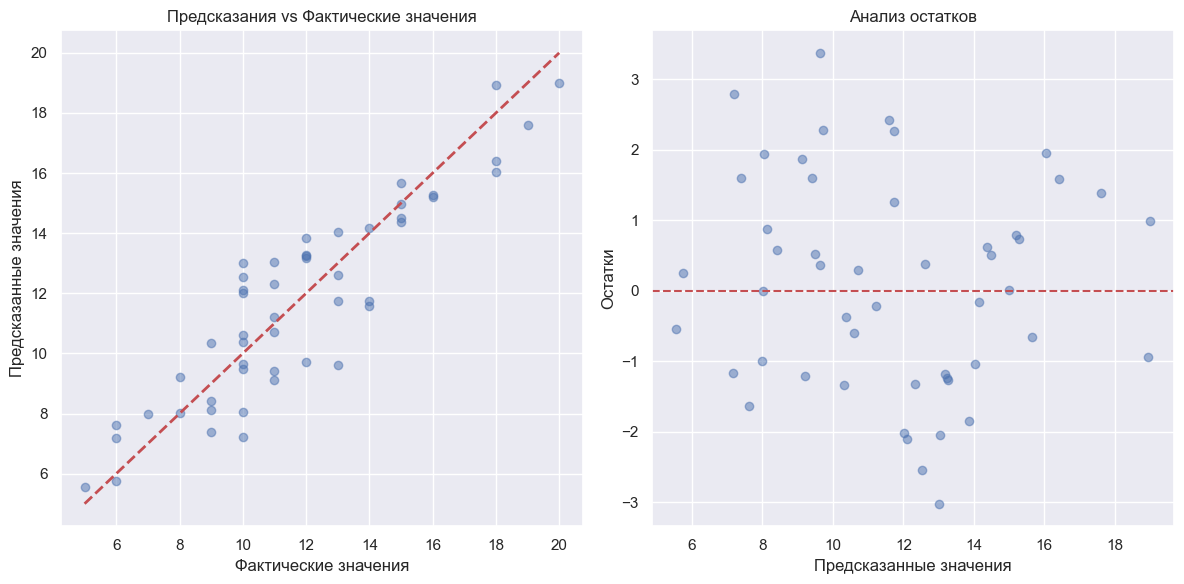

In [26]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказания vs Фактические значения')

plt.subplot(1, 2, 2)
residuals = y_test.values.flatten() - y_test_pred.flatten()
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Анализ остатков')

plt.tight_layout()
plt.show()

Несмотря на ограниченность данных и простоту модели, продемонстрирована удовлетворительная прогнозная эффективность. Модель успешно выявляет основные закономерности, сохраняя баланс между интерпретируемостью и предсказательной силой.